# Arbeitsblatt 1
## Aufgabe 1 - Feature Engineering
! Features dürfen nur numerische Werte und keine fehlenden Werte besitzen

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

- Anpassung der Pandas Options, sodas bei print eines Dataframes mehr Zeilen und alle Spalten ausgegeben werden

In [ ]:
pd.set_option('display.max_rows', 250)  # if print: show all rows
pd.set_option('display.max_columns', None)  # if print show all columns

- Lesen der CSV Datei in ein Pandas Data Frame
- Löschen von *trailing* Leerzeichen in den Spaltennamen

In [79]:
# read csv file
weather = pd.read_csv("weatherAUS.csv")  # read csv data into pandas data frame
weather.columns = weather.columns.str.strip() 

- **Extracting Date:** Aufteilung der *Date* Spalte in *Year*, *Month*, *Day* 
- Lösche die Date Spalte

In [80]:
# restructure Date field into Year, Month, Day and drop Date
weather['Date'] = pd.to_datetime(weather.Date, format="%Y-%m-%d")
weather['Year'] = weather['Date'].dt.year  # get year
weather['Month'] = weather['Date'].dt.month  # get month
weather['Day'] = weather['Date'].dt.day  # get day
weather.drop(labels=['Date'], axis=1, inplace=True)

- gruppe 14 arbeitet nur mit den Datensätzen der Jahre 2013 und 2018

In [81]:
#   we only work with years 2013 and 2018
weather = weather[weather.Year.isin([2013, 2018])]

In [82]:
weather.shape

(34236, 25)

In [83]:
describe_before = weather.describe()
weather

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
1431,Albury,12.1,34.5,0.0,NaN,NaN,W,44.0,SE,W,4.0,22.0,49.0,16.0,1012.8,1009.3,NaN,NaN,22.3,32.7,No,No,2013,1,1
1432,Albury,13.8,33.6,0.0,NaN,NaN,SSE,28.0,SSW,ESE,9.0,11.0,48.0,17.0,1012.2,1010.9,NaN,NaN,21.4,31.2,No,No,2013,1,2
1433,Albury,15.8,36.9,0.0,NaN,NaN,E,22.0,S,SSW,7.0,11.0,32.0,20.0,1015.8,1011.9,NaN,NaN,23.6,33.9,No,No,2013,1,3
1434,Albury,18.6,40.7,0.0,NaN,NaN,ENE,44.0,ESE,N,7.0,24.0,44.0,12.0,1012.3,1008.1,NaN,NaN,27.8,39.3,No,No,2013,1,4
1435,Albury,19.8,43.4,0.0,NaN,NaN,NW,81.0,S,ESE,7.0,11.0,36.0,17.0,1012.4,1009.8,NaN,1.0,30.7,42.4,No,Yes,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170449,Uluru,19.6,44.3,0.0,NaN,NaN,NNE,39.0,NE,NW,19.0,15.0,10.0,7.0,1006.4,1000.9,NaN,NaN,34.9,43.7,No,No,2018,12,27
170450,Uluru,22.4,45.6,0.0,NaN,NaN,N,50.0,N,ENE,22.0,11.0,11.0,8.0,1003.9,999.4,NaN,2.0,36.6,43.9,No,No,2018,12,28
170451,Uluru,27.6,46.1,0.0,NaN,NaN,S,46.0,S,SW,28.0,13.0,14.0,8.0,1003.7,999.9,NaN,1.0,37.1,44.4,No,No,2018,12,29
170452,Uluru,30.0,46.1,0.0,NaN,NaN,NNW,50.0,ESE,W,22.0,13.0,22.0,8.0,1005.5,1001.7,7.0,1.0,34.1,44.7,No,No,2018,12,30


- **Dropping incomplete columns:** Lösche die Spalten, in denen mehr als 70% der Zeilen fehlende Werte haben
- Nachteil: Die vorhandenen Werte gehen verloren und können für Analysen nicht genutzt werden
- Vorteil: Es müssen weniger Werte geschätzt, angenommen oder sonst wie gefüllt werden
    * zu viele geschätzte Werte können Analyseergebnisse verzerren

In [84]:
# ############################################
# delete columns that have Na / NaN > 70%
# ############################################
# get prop of  Na values per column
prop_na_per_col = weather.isna().sum() / len(weather)
cols_to_delete = []
for i in prop_na_per_col.index:
    if prop_na_per_col[i] > 0.7:
        cols_to_delete.append(i)

# columns to be dropped
cols_to_delete
# drop variables evaporation and sunshine
# axis = 1 : delete columns, inplace=True: replace current dataframe
weather.drop(labels=cols_to_delete, axis=1, inplace=True)

- **Dropping incomplete rows if applicable:** Lösche alle Zeilen, bei denen mehr als 70% der Werte fehlen
    * lösche die Zeilen nur, wenn die relative Anzahl nicht zu groß ist und der *impact* gering gehalten wird
    * wenn zu viele Zeilen betroffen: überlege weitere imputing Verfahren

In [85]:
# identify rows to be deleted
# get prop of Na values per row
i_rows_to_delete = []
c = 0
for i in range(len(weather)):  # betrachte jede Zeile einzeln
    prop = weather.iloc[i].isnull().sum()/weather.shape[1]  # errechne rel. Häufigkeit an fehlenden Werten
    if prop > 0.70:
        i_rows_to_delete.append(i)

In [86]:
print("Total rows to delete: ", len(i_rows_to_delete))
print("Prop rows to delete: ", len(i_rows_to_delete)/weather.shape[0])

Total rows to delete:  54
Prop rows to delete:  0.0015772870662460567


Die Ergebnisse der gelöschten Zeilen haben gezeigt, dass über die Hälfte der gelöschten Zeilen zur Region Newcastle gehören. Daher wurde zusätzlich geprüft, ob es Regionen (spezifisch Newcastle) gibt, die eine hohe rel. Häufigkeit von schlechten Datensätzen (zu löschende Reihen) aufweisen. Falls dem so wäre, würden diese Regionen nicht für weitere ANalysen verwendet werden, da zu viele geschätzte Werte beinhaltet wären.

- pro Region: wie hoch ist der Anteil zu löschender Zeilen gegenüber der gesamten Zeilenanzahl
- wenn Anteil > 50 %: betrachte die Region als schlechten Datenlieferant und lösche sie

In [87]:
# get prop of rows to delete per location -> check if specific location produces bad data
locations_to_be_deleted = []
for location in weather['Location'].unique():
    location_rows = weather.iloc[i_rows_to_delete]  # get all rows to be deleted
    location_rows = location_rows.loc[
        location_rows["Location"] == location]  # of those rows get the ones with current location
    prop = len(location_rows) / len(weather.loc[weather["Location"] == location])  # get prop of bad rows per location
    print(location, ": ", prop)
    if prop > 0.5:
        locations_to_be_deleted.append(location)
# -> no location needs to be dropped
print("### info: number of locations to be deleted: ", len(locations_to_be_deleted))

Albury :  0.0
BadgerysCreek :  0.0
Cobar :  0.0
CoffsHarbour :  0.0
Moree :  0.0
Newcastle :  0.04700854700854701
NorahHead :  0.0028694404591104736
NorfolkIsland :  0.0
Penrith :  0.0
Richmond :  0.004273504273504274
Sydney :  0.0
SydneyAirport :  0.0
WaggaWagga :  0.0
Williamtown :  0.0
Wollongong :  0.0
Canberra :  0.0
Tuggeranong :  0.0
MountGinini :  0.0014245014245014246
Ballarat :  0.0
Bendigo :  0.001443001443001443
Sale :  0.0
MelbourneAirport :  0.0
Melbourne :  0.0
Mildura :  0.0
Nhil :  0.0
Portland :  0.0
Watsonia :  0.0
Dartmoor :  0.0
Brisbane :  0.0
Cairns :  0.0
GoldCoast :  0.0
Townsville :  0.0
Adelaide :  0.0
MountGambier :  0.0
Nuriootpa :  0.0
Woomera :  0.0
Albany :  0.0
Witchcliffe :  0.0014245014245014246
PearceRAAF :  0.0
PerthAirport :  0.0
Perth :  0.0
SalmonGums :  0.016566265060240965
Walpole :  0.002849002849002849
Hobart :  0.0
Launceston :  0.0
AliceSprings :  0.0
Darwin :  0.0
Katherine :  0.0
Uluru :  0.0
### info: number of locations to be deleted:  

- zu löschende Zeilen verteilen sich auf wenige Regionen
- keine Region hat einen hohen ANteil zu löschender Zeilen
- höchster Anteil: Newcastle mit 4.93%

- lösche die identifizierten Zeilen aus dem Datensatz

In [88]:
# drop the identifies rows
print("### info: drop identified ", len(i_rows_to_delete), "rows")
rows_before = weather.shape[0]
print("num rows before: ", rows_before)
weather.drop(labels=weather.index[i_rows_to_delete], axis=0, inplace=True)
print("num rows after: ", weather.shape[0], "should equal: ", rows_before - len(i_rows_to_delete))

### info: drop identified  54 rows
num rows before:  34236
num rows after:  34182 should equal:  34182


- **Handling missing values:**
    * gruppiere den Datensatz nach Region
    * berechne den Median für die einzelnen Gruppen (Regionen)
    
Es wurde zuvor geprüft, ob bestimmte Spalten nicht oder nur selten den Zahlen-Wert 0 als Wert enthalten. Falls dem so wäre, hätte genauer überfrüft werden müssen, ob fehlende Werte gleichzusetzen mit dem Zahlen-Wert 0 sind. Dies war nicht der Fall.  


Wieso wird so vorgegangen: Die Wetterdaten sind aus Australien. Australien ist groß und erstreckt sich über mehr als eine Klimazone?????. Daher können die Wetterdaten derv verschiedenen Regionen sehr unterschiedlich aussehen. Um genauere Werte schätzen zu können wird daher der Schätzwert (Median) für jede einzelne Region bestimmt.
    

In [89]:
# ############################################
# handle null values
# ############################################
grouped_weather = weather.groupby('Location').describe(include=[np.number])
matrix_describe = grouped_weather.loc[:, grouped_weather.columns.get_level_values(1).isin({"mean", "50%"})]

- **Imputation numerical values:**
    * nummerische Werte werden mit Hilfe des Medians geschätzt (mean anfällig für Ausreißer)
    * verwende Median pro Region
    * für Spalten Cloud9am und Cloud3pm: nutze den gerundeten Median, damit ein gültiger okta Wert entsteht

In [90]:
for col in ["MinTemp", "MaxTemp", "Rainfall", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm",
            "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm",
            "Temp9am", "Temp3pm"]:

    if weather[col].isna().any():
        for location in weather['Location'].unique():
            # always calc median grouped by location
            location_col_median = matrix_describe.loc[location, ((matrix_describe.columns.get_level_values(1) == "50%")
                                                                 & (matrix_describe.columns.get_level_values(0) == col))]
            if location_col_median.isna().bool():  # check if median is NaN
                weather.loc[weather['Location'] == location, col] = 0
            else:
                if str.startswith(col, "Cloud"):
                    location_col_median[0] = round(location_col_median[0])  # Cloud doesn't include float
                weather.loc[weather.Location==location, col] = weather.loc[weather.Location==location, col].fillna(location_col_median[0], axis=0)
    else:
        print(col, ": no NaN values found")

In [73]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000
mean,12.076539,23.577177,2.069221,39.124013,14.216079,18.905798,67.207097,49.504213,936.106321,933.834884,3.781698,3.647036,17.088661,22.040554,2015.601954,6.724095,15.760956
std,6.407637,7.231341,8.327789,15.623289,8.936611,8.816922,19.777760,21.135031,275.600539,274.930531,3.252619,2.999451,6.577971,7.100303,2.497957,3.380673,8.820481
min,-8.000000,-3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.200000,-4.100000,2013.000000,1.000000,1.000000
25%,7.600000,18.200000,0.000000,30.000000,7.000000,13.000000,55.000000,34.000000,1011.200000,1008.700000,0.000000,0.000000,12.400000,16.900000,2013.000000,4.000000,8.000000
50%,11.900000,22.900000,0.000000,39.000000,13.000000,19.000000,68.000000,50.000000,1016.400000,1013.900000,4.000000,4.000000,16.800000,21.500000,2018.000000,7.000000,16.000000
75%,16.500000,28.700000,0.400000,48.000000,20.000000,24.000000,82.000000,64.000000,1021.300000,1018.800000,7.000000,7.000000,21.800000,26.800000,2018.000000,10.000000,23.000000
max,31.400000,47.300000,474.000000,131.000000,72.000000,65.000000,100.000000,100.000000,1040.500000,1039.100000,8.000000,8.000000,38.900000,45.900000,2018.000000,12.000000,31.000000


Anhand des describe Outputs ist zu sehen, dass keine NaN Werte mehr vorhanden sind, da für alle Spalten count mit der gesamteanzahl an Zeilen übereinstimmt. Wenn man diesen Output mit dem describe Output vor dem handling der NaN Values betrachtet, ist zu sehen, dass sich der die Werte des Medians und der Quantile nicht verändern, da der Median selbst für NaN eingesetzt wurde. Der mean verschiebt sich leicht in Richtung des Medians und die Standardabweichung sinkt.

- **One-Hot-Encoding**
    * Für kategorielle Spalten Location und alle Windrichtungs-Spalten
    * Einstellung *drop_first=True*, damit keine linearen Abhängigkeiten innerhalt der Spalten entstehen
    
Es wurde in Betracht gezogen, für die Spalten mit Windrichtung eine nummerische Codierung vorzunehmen. Jedoch wurde davon abgesehen, da die Windrichtung nicht ordinal sondern nominal ist.

In [91]:
# ################################################
# one hot encoding
# ################################################
for col in ["Location", "WindGustDir", "WindDir9am", "WindDir3pm"]:
    encoded_columns = pd.get_dummies(weather[col], prefix=col, drop_first=True)
    weather = weather.join(encoded_columns).drop(col, axis=1)

- **Codierung binärer Daten:**
    * boolean Werte als 0 oder 1 codieren
    * NaN Werte als 0 (False) betrachten

In [92]:
# ###############################################
# encode binary data
# ###############################################
for col in ['RainToday', 'RainTomorrow']:
    weather.loc[weather[col] == "No", col] = 0
    weather.loc[weather[col].isna(), col] = 0
    weather.loc[weather[col] == "Yes", col] = 1
    weather[col] = weather[col].astype(int)

In [93]:
print(weather.isna().any().any(), " should equal False") # check if any NaN values left

False  should equal False


In [94]:
weather.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000,34182.000000
mean,12.076539,23.577177,2.069221,39.124013,14.216079,18.905798,67.207097,49.504213,936.106321,933.834884,3.781698,3.647036,17.088661,22.040554,0.201217,0.201129,2015.601954,6.724095,15.760956,0.020537,0.020537,0.020537,0.020040,0.020537,0.020245,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.019630,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020508,0.019572,0.019630,0.020332,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020537,0.020449,0.020537,0.019104,0.020537,0.020537,0.020537,0.020537,0.019630,0.020537,0.020479,0.020537,0.020537,0.020508,0.020537,0.020537,0.057077,0.050494,0.064742,0.049236,0.044936,0.046955,0.058920,0.059037,0.061465,0.057896,0.061553,0.059827,0.071587,0.064215,0.064888,0.051986,0.054941,0.086420,0.052220,

Anhand des weather.describe outputs kann man sehen, dass keine NaN Values mehr vorhanden sind. Da der count aller Spalten mit der Gesamtanzahl an zeilen übereinstimmt und somit keine Werte aus der Berechnung ausgeschlossen wurden.

In [95]:
weather.shape

(34182, 112)

Das Endergebnis des grundlegenden Feature Engineerings enthält 34182 Zeilen und 112 Spalten. Das sind 54 Zeilen weniger und 89 Spalten mehr als vor dem feature Engineering. Die höhere Spaltenanzahl ist vertretbar, da die Zeilenanzahl weiterhin sehr viel höher ist.

In [23]:
# ##############################################
# AB1 A2 - Decision Tree
# ##############################################

from sklearn.tree import DecisionTreeClassifier

In [24]:
# split data into test and train
n = weather.shape[0]  # number of rows

X_train, X_test, y_train, y_test = train_test_split(weather.drop(["RainTomorrow"], axis=1), weather.RainTomorrow,
                                                    test_size=0.2)

In [25]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X=X_train, y=y_train)

IndexError: list index out of range

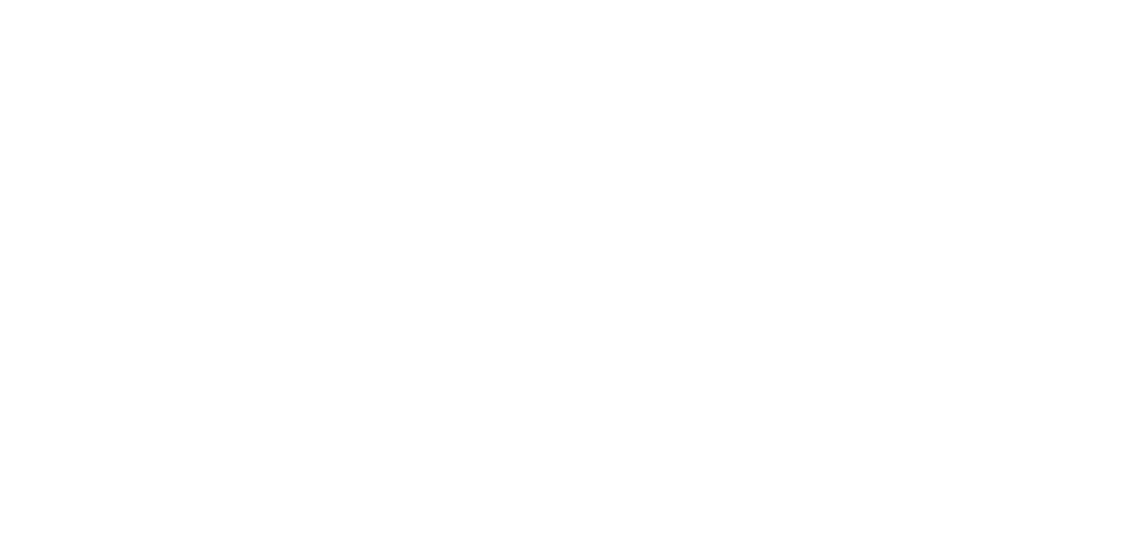

In [26]:
fn = weather.columns

fig, ax = plt.subplots(figsize = (20,10))
tree.plot_tree(clf, ax=ax,
               feature_names=fn,
               class_names= ["Yes", "No"],
               filled = True,
               rounded = True,
               precision =2,
               fontsize = 10);